In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
stop_words=set(stopwords.words('english'))
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
import pickle
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [2]:
df =pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\FINAL PROJECT\FinalBalancedDataset.csv")
df.head(2)

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...


In [3]:
df.size

170235

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [10]:
df['tweet'].values

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again',
       'youu got wild bitches tellin you lies',
       '~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB'],
      dtype=object)

## Cleaning & Pre processing data ##

In [11]:
def cleaned_text(texts):
    clean_texts =[]
    for text in texts:
        text = text.lower()
        tokens = word_tokenize(text)
        cleaned_token =[]
        lemmatizer = WordNetLemmatizer()
        for word in tokens:
            if (word.isalnum()) and (not word.isdigit()) and (word not in stop_words):
                word = word.strip(string.punctuation)
                word = lemmatizer.lemmatize(word)
                word = word.strip()
                cleaned_token.append(word)
            cleaned_text = " ".join(cleaned_token)
        clean_texts.append(cleaned_text)
    return clean_texts

In [12]:
df['cleaned_tweet'] = cleaned_text(df['tweet'].values)
df.head()

,Toxicity,tweet,cleaned_tweet
0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit ca use cause offe...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model love u take u time
4,0,factsguide: society now #motivation,factsguide society motivation


In [13]:
df = df.head(2000)

## Bag of words appraoch ##

In [14]:
X =df['cleaned_tweet']
model = CountVectorizer()
model.fit(X)
output = pd.DataFrame(model.transform(X).toarray())
output.columns = model.get_feature_names_out()
X = output
X

,100k,10k,12daystoolong,13cabs,13daystogo,14th,16mm,1800s,18th,19days,...,zero,zim,zimbabwe,zionazi,ziy,zoing,zone,zoo,zpamdelacruz,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X =df['cleaned_tweet']
model = CountVectorizer()
model.fit(X)
output = pd.DataFrame(model.transform(X).toarray())
output.columns = model.get_feature_names_out()
X = output
y = df['Toxicity']
model = LogisticRegression()
model.fit(X,y)
pred = model.predict(X)
accuracy_score(y,pred)

0.981

In [16]:
X =df['cleaned_tweet']
model = CountVectorizer()
model.fit(X)
output = pd.DataFrame(model.transform(X).toarray())
output.columns = model.get_feature_names_out()
X = output
y = df['Toxicity']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Imbalanced data ##

In [17]:
y_train.value_counts()

Toxicity
0    1477
1     123
Name: count, dtype: int64

In [18]:
X =df['cleaned_tweet']
model = CountVectorizer()
model.fit(X)
output = pd.DataFrame(model.transform(X).toarray())
output.columns = model.get_feature_names_out()
X = output
y = df['Toxicity']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Balanced data ##

In [19]:
y_train.value_counts()

Toxicity
1    1489
0    1479
Name: count, dtype: int64

In [20]:
X =df['cleaned_tweet']
model = CountVectorizer()
model.fit(X)
output = pd.DataFrame(model.transform(X).toarray())
output.columns = model.get_feature_names_out()
X = output
y = df['Toxicity']

ros = SMOTE()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

y_train.value_counts()

Toxicity
1    1505
0    1463
Name: count, dtype: int64

********LogisticRegression*********
Train Accuracy : 0.981875
Train Precision : 0.9822210335747202
Train Recall : 0.981875
Train F1 Score : 0.9805863604648531

Test Accuracy : 0.92
Test Precision : 0.9108860759493672
Test Recall : 0.92
Test F1_Score: 0.8915789473684211

confusion matrix :
[[364   1]
 [ 31   4]]

RocCurve Display:


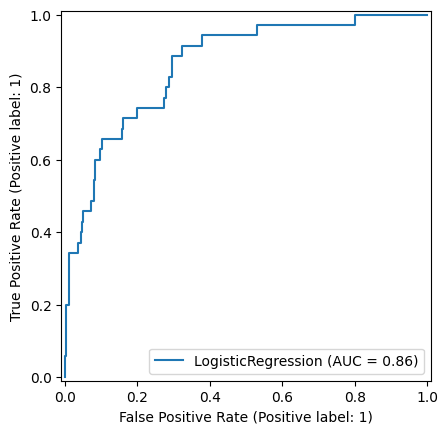

In [21]:
X =df['cleaned_tweet']
model = CountVectorizer()
model.fit(X)
output = pd.DataFrame(model.transform(X).toarray())
output.columns = model.get_feature_names_out()
X = output
y = df['Toxicity']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = LogisticRegression()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"********{type(model).__name__}*********")
print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
print()
print(f"confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
print()
print("RocCurve Display:\n",RocCurveDisplay.from_estimator(model, x_test, y_test))
plt.show()




********LogisticRegression*********
Train Accuracy : 0.9993261455525606
Train Precision : 0.9993270524899058
Train Recall : 0.9993261455525606
Train F1 Score : 0.9993261452465767

Test Accuracy : 0.9824797843665768
Test Precision : 0.9830729166666667
Test Recall : 0.9824797843665768
Test F1_Score: 0.9824744047456827

confusion matrix :
[[358  13]
 [  0 371]]

RocCurve Display:


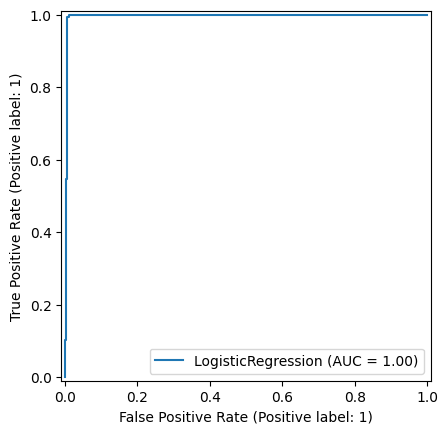

In [22]:
X =df['cleaned_tweet']
model = CountVectorizer()
model.fit(X)
output = pd.DataFrame(model.transform(X).toarray())
X = output
y = df['Toxicity']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = LogisticRegression()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"********{type(model).__name__}*********")
print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
print()
print(f"confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
print()
print("RocCurve Display:\n",RocCurveDisplay.from_estimator(model, x_test, y_test))
plt.show()



********LogisticRegression*********
Train Accuracy : 0.9794474393530997
Train Precision : 0.9800542080604434
Train Recall : 0.9794474393530997
Train F1 Score : 0.9794379114541052

Test Accuracy : 0.8814016172506739
Test Precision : 0.897798626301296
Test Recall : 0.8814016172506739
Test F1_Score: 0.8806009552546797

confusion matrix :
[[302  81]
 [  7 352]]

RocCurve Display:


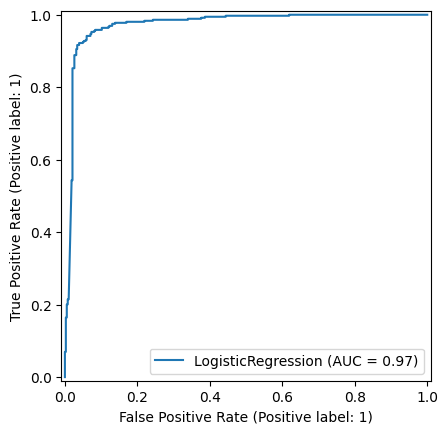

********KNeighborsClassifier*********
Train Accuracy : 0.5835579514824798
Train Precision : 0.7719629192598059
Train Recall : 0.5835579514824798
Train F1 Score : 0.49374876860120237

Test Accuracy : 0.5471698113207547
Test Precision : 0.7660920320347495
Test Recall : 0.5471698113207547
Test F1_Score: 0.4424279765834911

confusion matrix :
[[ 47 336]
 [  0 359]]

RocCurve Display:


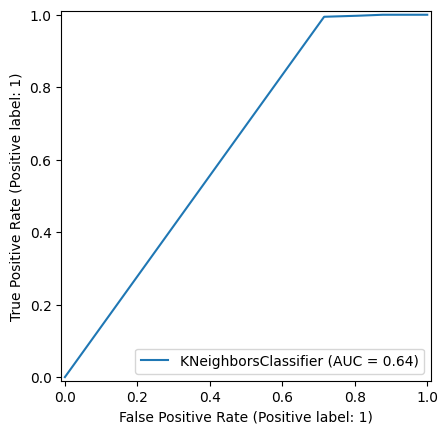

********SVC*********
Train Accuracy : 0.9723719676549866
Train Precision : 0.9726875153543857
Train Recall : 0.9723719676549866
Train F1 Score : 0.9723702990887245

Test Accuracy : 0.9514824797843666
Test Precision : 0.9515754042424942
Test Recall : 0.9514824797843666
Test F1_Score: 0.9514665916169791

confusion matrix :
[[368  15]
 [ 21 338]]

RocCurve Display:


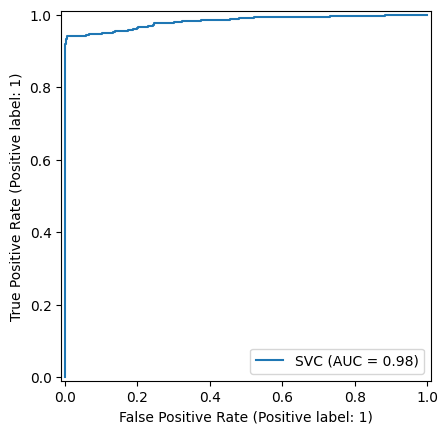

********DecisionTreeClassifier*********
Train Accuracy : 0.9996630727762803
Train Precision : 0.999663297844566
Train Recall : 0.9996630727762803
Train F1 Score : 0.9996630718200135

Test Accuracy : 0.8881401617250674
Test Precision : 0.9025796763990412
Test Recall : 0.8881401617250674
Test F1_Score: 0.8875069801320655

confusion matrix :
[[307  76]
 [  7 352]]

RocCurve Display:


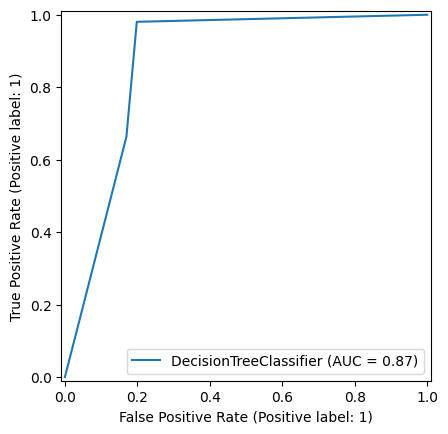

********RandomForestClassifier*********
Train Accuracy : 0.9996630727762803
Train Precision : 0.999663297844566
Train Recall : 0.9996630727762803
Train F1 Score : 0.9996630718200135

Test Accuracy : 0.8733153638814016
Test Precision : 0.8921914141570417
Test Recall : 0.8733153638814016
Test F1_Score: 0.8722786117061178

confusion matrix :
[[296  87]
 [  7 352]]

RocCurve Display:


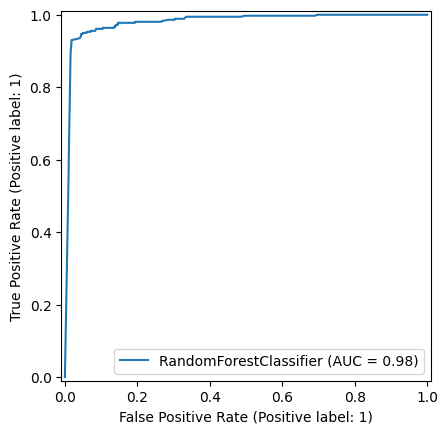

********GaussianNB*********
Train Accuracy : 0.9956199460916442
Train Precision : 0.995657680154473
Train Recall : 0.9956199460916442
Train F1 Score : 0.9956197068899577

Test Accuracy : 0.9487870619946092
Test Precision : 0.9489312694417819
Test Recall : 0.9487870619946092
Test F1_Score: 0.9487971139670296

confusion matrix :
[[361  22]
 [ 16 343]]

RocCurve Display:


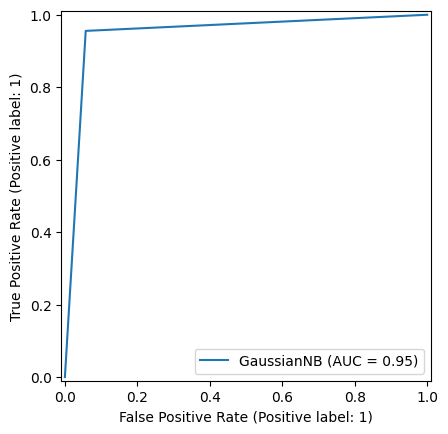

In [23]:
X =df['cleaned_tweet']
model = CountVectorizer()
model.fit(X)
output = pd.DataFrame(model.transform(X).toarray())
output.columns = model.get_feature_names_out()
X = output
y = df['Toxicity']

ros = SMOTE()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    print(f"confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
    print()
    print("RocCurve Display:\n",RocCurveDisplay.from_estimator(model, x_test, y_test))
    plt.show()

## Saving the Model ##

In [24]:
with open("model.pkl","wb") as file:
    pickle.dump(model,file)

## Loading the Model ##

In [25]:
with open("model.pkl","rb") as file:
    nlp_model = pickle.load(file)

In [26]:
df['Toxicity'].unique()

array([0, 1], dtype=int64)

In [27]:
import seaborn as sns

[Text(0, 0, '1855'), Text(0, 0, '145')]

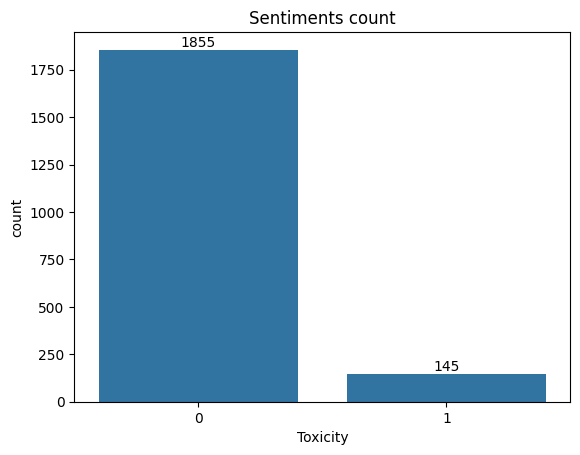

In [28]:
sent_count = sns.countplot(data=df,x='Toxicity')
sent_count.set_title('Sentiments count')
sent_count.bar_label(container=sent_count.containers[0])

# TF-IDF method: #

In [121]:
df_1 = pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\FINAL PROJECT\FinalBalancedDataset.csv")
df_1.head(3)

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty


In [122]:
df_1.drop(columns=['Unnamed: 0'],inplace=True)

In [123]:
df_1.head(3)

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty


In [124]:
df_1['tweet'].values

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again',
       'youu got wild bitches tellin you lies',
       '~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB'],
      dtype=object)

In [125]:
df_1.size

113490

In [126]:
df_1 = df_1.head(2000)

In [127]:
df_1['tweet']

0        @user when a father is dysfunctional and is s...
1       @user @user thanks for #lyft credit i can't us...
2                                     bihday your majesty
3       #model   i love u take with u all the time in ...
4                  factsguide: society now    #motivation
                              ...                        
1995    sho film i made on my relationship with caffei...
1996     @user one the flowers i planted as a seed blo...
1997    @user riyadh is renowned for some of the deadl...
1998    @user ooohhh. im busy with my internship here ...
1999     coolestlifehack: this is what a porcupine fis...
Name: tweet, Length: 2000, dtype: object

In [128]:
df_1

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
1995,0,sho film i made on my relationship with caffei...
1996,0,@user one the flowers i planted as a seed blo...
1997,1,@user riyadh is renowned for some of the deadl...
1998,0,@user ooohhh. im busy with my internship here ...


In [ ]:
corpus = cleaned_text(df_1['tweet'].values)
model = TfidfVectorizer()
data = pd.DataFrame(model.fit_transform(corpus).toarray())
data.columns = model.get_feature_names_out()
data.index = corpus
data['Toxicity'] = df_1['Toxicity']
X = data.drop(['Toxicity'],axis=1)
y = df_1['Toxicity']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

y_train.value_counts(normalize=True)


Toxicity
0    0.9275
1    0.0725
Name: proportion, dtype: float64

In [135]:
ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

y_train.value_counts(normalize=True)

Toxicity
0    0.501348
1    0.498652
Name: proportion, dtype: float64

In [136]:
ros = SMOTE()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

y_train.value_counts(normalize=True)

Toxicity
1    0.506739
0    0.493261
Name: proportion, dtype: float64

********LogisticRegression*********
Train Accuracy : 0.9939353099730458
Train Precision : 0.9939389536286443
Train Recall : 0.9939353099730458
Train F1 Score : 0.9939353264962334

Test Accuracy : 0.9878706199460916
Test Precision : 0.9879012129585771
Test Recall : 0.9878706199460916
Test F1_Score: 0.9878697604800316

confusion matrix :
[[360   6]
 [  3 373]]

RocCurve Display:


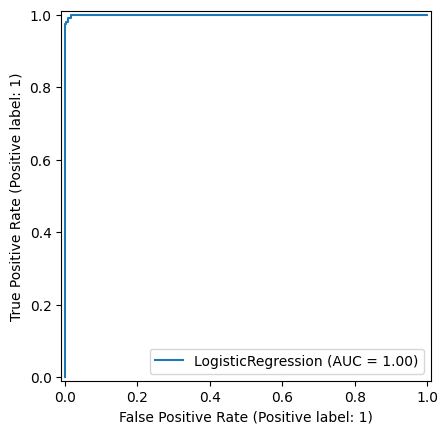

In [138]:
corpus = cleaned_text(df_1['tweet'].values)
model = TfidfVectorizer()
data = pd.DataFrame(model.fit_transform(corpus).toarray())
data.columns = model.get_feature_names_out()
data.index = corpus
data['Toxicity'] = df_1['Toxicity']
X = data.drop(['Toxicity'],axis=1)
y = df_1['Toxicity']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = LogisticRegression()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"********{type(model).__name__}*********")
print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
print()
print(f"confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
print()
print("RocCurve Display:\n",RocCurveDisplay.from_estimator(model, x_test, y_test))
plt.show()

********LogisticRegression*********
Train Accuracy : 0.9976415094339622
Train Precision : 0.9976524428339373
Train Recall : 0.9976415094339622
Train F1 Score : 0.9976414250778123

Test Accuracy : 0.9865229110512129
Test Precision : 0.9868952063260413
Test Recall : 0.9865229110512129
Test F1_Score: 0.9865297748602014

confusion matrix :
[[380  10]
 [  0 352]]

RocCurve Display:


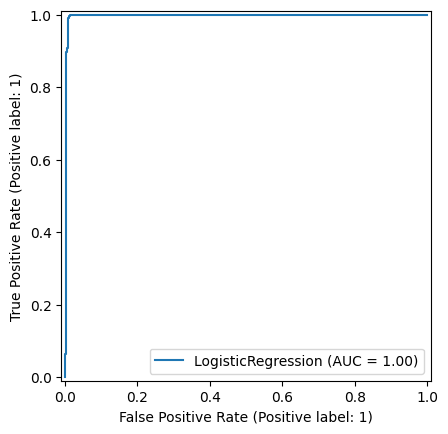

********KNeighborsClassifier*********
Train Accuracy : 0.9605795148247979
Train Precision : 0.963426549865229
Train Recall : 0.9605795148247979
Train F1 Score : 0.960498138549325

Test Accuracy : 0.9191374663072777
Test Precision : 0.9309135634469945
Test Recall : 0.9191374663072777
Test F1_Score: 0.9189434244506851

confusion matrix :
[[330  60]
 [  0 352]]

RocCurve Display:


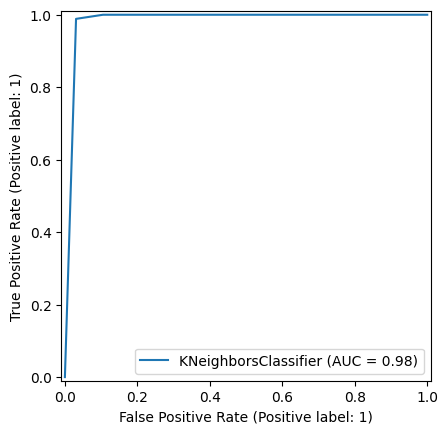

********SVC*********
Train Accuracy : 1.0
Train Precision : 1.0
Train Recall : 1.0
Train F1 Score : 1.0

Test Accuracy : 0.9986522911051213
Test Precision : 0.9986561089773447
Test Recall : 0.9986522911051213
Test F1_Score: 0.9986523819020678

confusion matrix :
[[389   1]
 [  0 352]]

RocCurve Display:


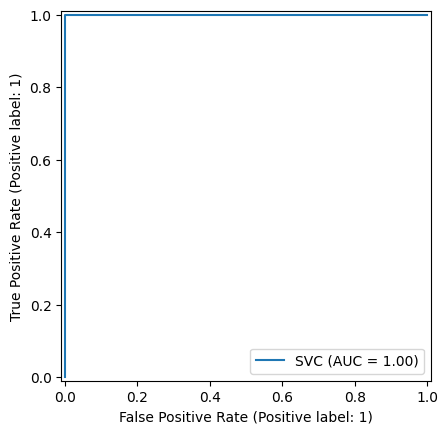

********DecisionTreeClassifier*********
Train Accuracy : 1.0
Train Precision : 1.0
Train Recall : 1.0
Train F1 Score : 1.0

Test Accuracy : 0.9690026954177897
Test Precision : 0.9709038634321653
Test Recall : 0.9690026954177897
Test F1_Score: 0.9690221272045264

confusion matrix :
[[367  23]
 [  0 352]]

RocCurve Display:


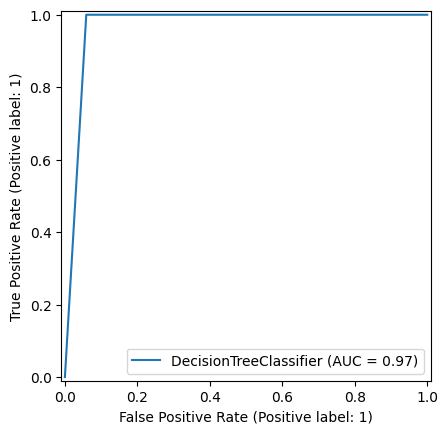

********RandomForestClassifier*********
Train Accuracy : 1.0
Train Precision : 1.0
Train Recall : 1.0
Train F1 Score : 1.0

Test Accuracy : 0.9946091644204852
Test Precision : 0.9946697356067719
Test Recall : 0.9946091644204852
Test F1_Score: 0.9946104988634471

confusion matrix :
[[386   4]
 [  0 352]]

RocCurve Display:


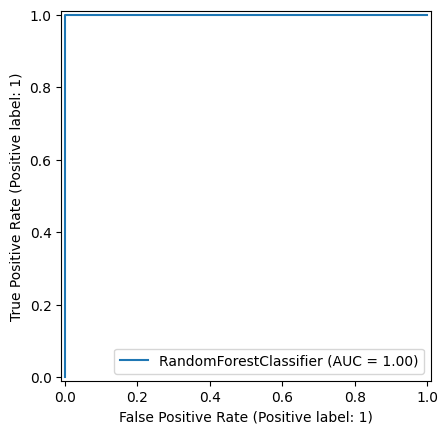

********GaussianNB*********
Train Accuracy : 0.9949460916442049
Train Precision : 0.9949960314500922
Train Recall : 0.9949460916442049
Train F1 Score : 0.994945635391758

Test Accuracy : 0.9568733153638814
Test Precision : 0.9604672057502246
Test Recall : 0.9568733153638814
Test F1_Score: 0.9568883560583604

confusion matrix :
[[358  32]
 [  0 352]]

RocCurve Display:


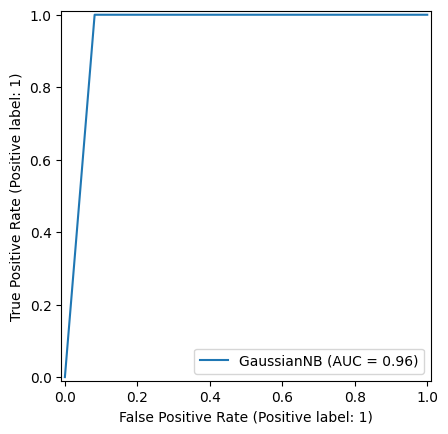

In [139]:
corpus = cleaned_text(df_1['tweet'].values)
model = TfidfVectorizer()
data = pd.DataFrame(model.fit_transform(corpus).toarray())
data.columns = model.get_feature_names_out()
data.index = corpus
data['Toxicity'] = df_1['Toxicity']
X = data.drop(['Toxicity'],axis=1)
y = df_1['Toxicity']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    print(f"confusion matrix :\n{confusion_matrix(y_test,test_pred)}")
    print()
    print("RocCurve Display:\n",RocCurveDisplay.from_estimator(model, x_test, y_test))
    plt.show()

## Saving the Model ##

In [140]:
with open("model.pkl","wb") as files:
    pickle.dump(model,files)

## Loading the Model ##

In [141]:
with open ("model.pkl","rb") as files:
    tf_model = pickle.load(files)